### Our goal is to fit a model to predict price of diamonds based on those characteristics

In [1]:
'''
Jupyter interactive libraries

'''
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from ipywidgets import *
from ipywidgets import widget
import os

'''
Data munging libraries

'''
import pandas as pd
import numpy as np

'''
Visualization Libraries

'''
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%matplotlib notebook
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 2) 
from bokeh.plotting import figure, output_notebook, show, gridplot
from bokeh.layouts import row

'''
ML libraries

'''
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import *
output_notebook();

Loading BokehJS ...

In [23]:
# read the data
diam_df = pd.read_csv('diamonds.csv')

In [24]:
diam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [25]:
diam_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Unamed looks like an index, we will drop it

In [26]:
diam_df=diam_df.drop('Unnamed: 0',axis=1)

In [27]:
diam_reduced = diam_df[diam_df.columns.difference(['cut', 'color', 'clarity'])]

In [28]:
diam_reduced.describe()

,carat,depth,price,table,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,3932.80,57.46,5.73,5.73,3.54
std,0.47,1.43,3989.44,2.23,1.12,1.14,0.71
min,0.20,43.00,326.00,43.00,0.00,0.00,0.00
25%,0.40,61.00,950.00,56.00,4.71,4.72,2.91
50%,0.70,61.80,2401.00,57.00,5.70,5.71,3.53
75%,1.04,62.50,5324.25,59.00,6.54,6.54,4.04
max,5.01,79.00,18823.00,95.00,10.74,58.90,31.80


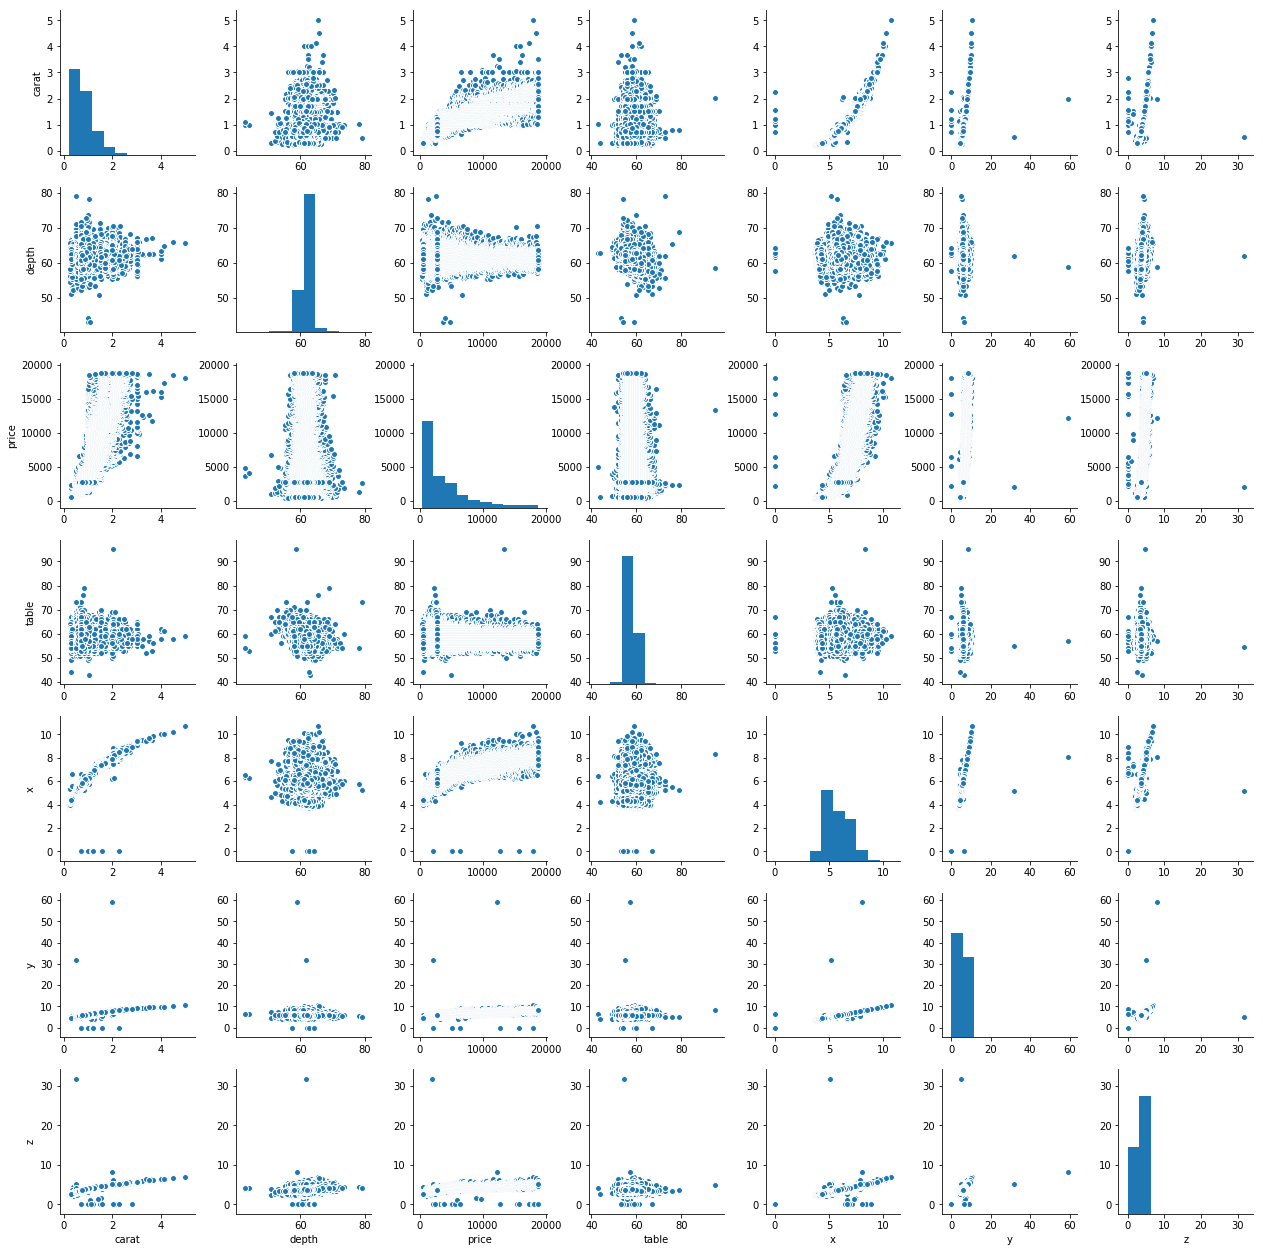

In [8]:
sns.pairplot(diam_reduced)
plt.show();

**What Should we do with X, Y and Z, The table variable combines them all, so I will drop them from X later**

In [31]:
# Creating dummy variables for the categorical variabes
categorical_cols = ['cut', 'color', 'clarity']
for c in categorical_cols:    
    diam_df=diam_df.join(pd.get_dummies(diam_df[c],sparse=True,drop_first=True))

In [32]:
diam_df

,carat,cut,color,clarity,depth,table,price,x,y,z,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


## Step 1: Split the data
** Will split the data such that the cut is balanced among training and test**

In [33]:
def split_data(data_df,category,nsplit,testsize,random=2301):
    trainsplit  =  StratifiedShuffleSplit ( n_splits = nsplit ,  test_size = testsize ,  random_state = random )
    
    """
    n_splits is for number of splits
    test_size is % size from the entire population(between 0 and 1) for the test data set
    random_state this is used to generate repeatable results next time we run this code again
    """
    for  train_index ,  test_index  in  trainsplit . split ( data_df ,  data_df[category]):
        strat_train_set  =  data_df.loc [train_index ]
        strat_test_set  =  data_df.loc[test_index ]
        
    """ 
    stratifying by classification variables
        
    """
    return strat_train_set,strat_test_set

In [34]:
train_df,test_df =split_data(data_df=diam_df,category=['cut'],nsplit=1,testsize=0.2)
X_train=train_df[train_df.columns.difference(['cut', 'color', 'clarity','x','y','z','price'])].values

X_test=test_df[test_df.columns.difference(['cut', 'color', 'clarity','x','y','z','price'])].values
y_train=train_df["price"].values
y_test=test_df["price"].values;

## Step 2: Fit Fully Connected Neural Network Model

In [30]:
from keras.models import Sequential, load_model
from keras.layers import Activation, Dropout,Flatten,Dense
from keras import backend as K

In [37]:
X_train.shape

(43152, 20)

In [56]:
# as first layer in a sequential model:
model=Sequential()

# Adding input layer with input data and 50 nodes
model.add(Dense(50, input_dim=X_train.shape[1]))
# adding dropout to regularize
model.add(Dropout(rate=0.1))
# after the first layer, no need to specify the size of the input anymore:
model.add(Dense(50,activation='elu'))
model.add(Dropout(rate=0.1))
model.add(Dense(200,activation='elu'))
model.add(Dropout(rate=0.2))
model.add(Dense(500,activation='elu'))
model.add(Dropout(rate=0.4))
model.add(Dense(1,activation='elu'))

# now we can compile the graph network and perform fit
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(X_train,y_train,epochs=150,verbose=2)

Epoch 1/150
5s - loss: 1748.5267
Epoch 2/150
5s - loss: 676.6900
Epoch 3/150
5s - loss: 599.5409
Epoch 4/150
5s - loss: 576.5112
Epoch 5/150
5s - loss: 557.1337
Epoch 6/150
4s - loss: 544.6605
Epoch 7/150
5s - loss: 534.1366
Epoch 8/150
5s - loss: 526.5546
Epoch 9/150
5s - loss: 519.2765
Epoch 10/150
6s - loss: 506.6561
Epoch 11/150
5s - loss: 503.8936
Epoch 12/150
5s - loss: 500.1085
Epoch 13/150
5s - loss: 500.6707
Epoch 14/150
5s - loss: 494.9005
Epoch 15/150
5s - loss: 489.9271
Epoch 16/150
5s - loss: 489.2824
Epoch 17/150
4s - loss: 486.2529
Epoch 18/150
5s - loss: 478.3920
Epoch 19/150
6s - loss: 480.5601
Epoch 20/150
5s - loss: 482.1687
Epoch 21/150
6s - loss: 476.5379
Epoch 22/150
6s - loss: 468.2804
Epoch 23/150
5s - loss: 466.2626
Epoch 24/150
6s - loss: 463.1082
Epoch 25/150
6s - loss: 471.9448
Epoch 26/150
5s - loss: 462.1563
Epoch 27/150
5s - loss: 461.6610
Epoch 28/150
5s - loss: 457.8828
Epoch 29/150
6s - loss: 457.4138
Epoch 30/150
6s - loss: 457.8465
Epoch 31/150
5s - 

## Step3: Predict

In [62]:
y_train_pred = model.predict(X_train).reshape(-1)

In [65]:
'''
creating a new plot with a title and axis labels. 
'''
p1 = figure(plot_width=500, plot_height=500,title="training actual vs predicted", x_axis_label='actual', 
            y_axis_label='predicted')
p1.scatter(y_train, y_train_pred)
show(p1);

## Step 4: Run and assess model on test data

In [68]:
y_test_pred = model.predict(X_test).reshape(-1)
print("Test Error: ",mean_squared_error(y_test, y_test_pred))

Test Error:  342672.621922


In [71]:
'''
creating a new plot with a title and axis labels. 
'''
p1 = figure(plot_width=350, plot_height=350,title="training actual vs predicted", x_axis_label='actual', 
            y_axis_label='predicted')
p1.scatter(y_test, y_test_pred)
show(p1);

<!--NAVIGATION-->
##### < [Machine Learning with Scikit-Learn](05_scikit.ipynb) | [Contents](00_Index.ipynb#4--Statistical-Analysis-with-StatsModels) 